Prediction on tax fraud

Intro：The study was conducted to build a classification model that can predict the classification of a company being fraudulent based on current and past risk factors, collecting data bases from 2015-2016 to build predictive tools for classifying suspicious companies.And this research can be applied to many industries such as industry and agriculture. In addition, the study is authentic and multi-faceted: the combination of data in the dataset takes into account multiple aspects such as audit reports, environmental status reports, persistent problem reports, etc.

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

Dataset of companies with no risk.

In [3]:
audit_risk <- read_csv("data/audit_risk.csv")
audit_risk

New names:
• `Score_B` -> `Score_B...7`
• `Score_B` -> `Score_B...11`
Rows: 776 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): LOCATION_ID
dbl (26): Sector_score, PARA_A, Score_A, Risk_A, PARA_B, Score_B...7, Risk_B...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B...7,Risk_B,TOTAL,numbers,⋯,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5,⋯,0.4,0,0.2,0,2.4,8.574,0.4,0.5,1.7148,1
3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5,⋯,0.4,0,0.2,0,2.0,2.554,0.4,0.5,0.5108,0
3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5,⋯,0.4,0,0.2,0,2.0,1.548,0.4,0.5,0.3096,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5,⋯,0.4,0,0.2,0,2,1.456,0.4,0.5,0.2912,0
55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5,⋯,0.4,0,0.2,0,2,1.440,0.4,0.5,0.2880,0
55.57,15,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5,⋯,0.4,0,0.2,0,2,1.464,0.4,0.5,0.2928,0


In [62]:
risk_data <- audit_risk |>
                select(LOCATION_ID,Sector_score,Money_Value,History,District_Loss,contains("Risk")) |>
                mutate(Sector_score = (Sector_score-mean(Sector_score, na.rm = TRUE))/sd(Sector_score, na.rm = TRUE)) |>
                mutate(Money_Value = (Money_Value-mean(Money_Value, na.rm = TRUE))/sd(Money_Value, na.rm = TRUE))
risk_data

LOCATION_ID,Sector_score,Money_Value,History,District_Loss,Risk_A,Risk_B,Risk_C,Risk_D,RiSk_E,Risk_F,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23,-0.6700327,-0.1615102,0,2,2.508,0.500,1,0.676,0.4,0,8.574,0.4,0.5,1.7148,1
6,-0.6700327,-0.1981432,0,2,0.000,0.966,1,0.188,0.4,0,2.554,0.4,0.5,0.5108,0
6,-0.6700327,-0.2122560,0,2,0.102,0.046,1,0.000,0.4,0,1.548,0.4,0.5,0.3096,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
14,1.455053,-0.2122560,0,2,0.048,0.008,1,0.000,0.4,0,1.456,0.4,0.5,0.2912,0
18,1.455053,-0.2122560,0,2,0.040,0.000,1,0.000,0.4,0,1.440,0.4,0.5,0.2880,0
15,1.455053,-0.2074516,0,2,0.000,0.000,1,0.064,0.4,0,1.464,0.4,0.5,0.2928,0


Warning message:
“Removed 1 rows containing missing values (geom_point).”


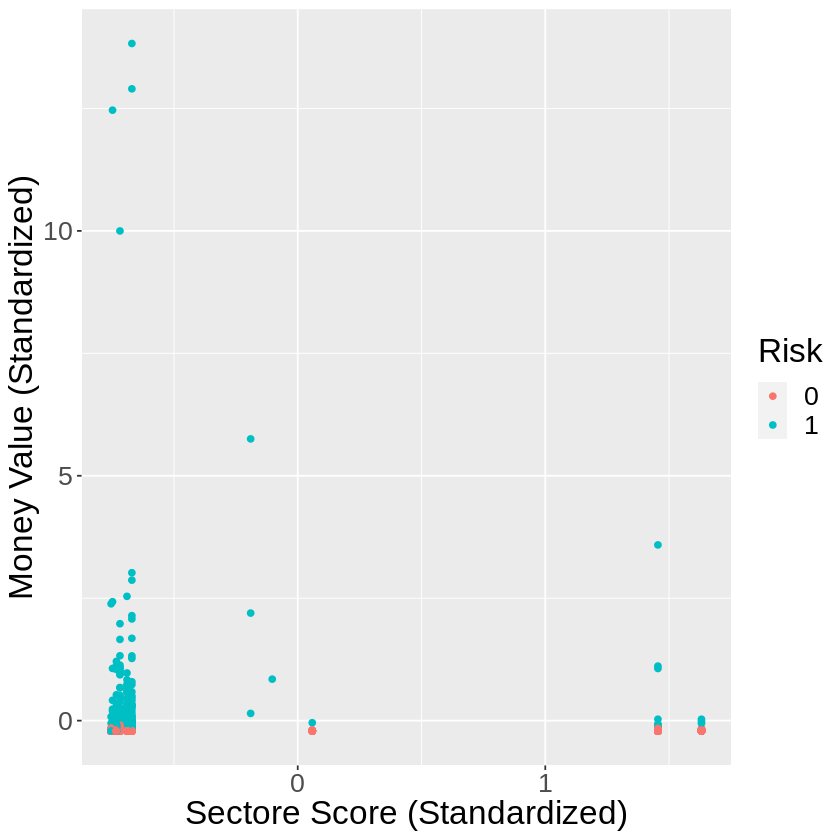

In [64]:
risk_plot <- risk_data |>
                ggplot(aes(x = Sector_score, y = Money_Value, color = as_factor(Risk))) +
                geom_point() +
                labs(x = "Sectore Score (Standardized)", y = "Money Value (Standardized)", color = "Risk") +
                theme(text = element_text(size = 20))
risk_plot

In [12]:
audit_risk_0 <- audit_risk |>
filter(Risk == 0)|>
select(Sector_score,LOCATION_ID,Money_Value,History,District_Loss,contains("Risk"))|>
pivot_longer(cols=Risk_A:Risk_F,names_to="Type",values_to="Value")

audit_risk_0

Sector_score,LOCATION_ID,Money_Value,History,District_Loss,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Type,Value
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
3.89,6,0.94,0,2,2.554,0.4,0.5,0.5108,0,Risk_A,0.000
3.89,6,0.94,0,2,2.554,0.4,0.5,0.5108,0,Risk_B,0.966
3.89,6,0.94,0,2,2.554,0.4,0.5,0.5108,0,Risk_C,1.000
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55.57,15,0.32,0,2,1.464,0.4,0.5,0.2928,0,Risk_D,0.064
55.57,15,0.32,0,2,1.464,0.4,0.5,0.2928,0,RiSk_E,0.400
55.57,15,0.32,0,2,1.464,0.4,0.5,0.2928,0,Risk_F,0.000


Dataset of companies at risk.

In [11]:
audit_risk_1 <- audit_risk |>
filter(Risk == 1)|>
select(Sector_score,LOCATION_ID,Money_Value,History,District_Loss,contains("Risk"))|>
pivot_longer(cols=Risk_A:Risk_F,names_to="Type",values_to="Value")

audit_risk_1


Sector_score,LOCATION_ID,Money_Value,History,District_Loss,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Type,Value
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
3.89,23,3.38,0,2,8.574,0.4,0.5,1.7148,1,Risk_A,2.508
3.89,23,3.38,0,2,8.574,0.4,0.5,1.7148,1,Risk_B,0.500
3.89,23,3.38,0,2,8.574,0.4,0.5,1.7148,1,Risk_C,1.000
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55.57,13,16.09,0,2,12.118,0.4,0.5,2.4236,1,Risk_D,9.654
55.57,13,16.09,0,2,12.118,0.4,0.5,2.4236,1,RiSk_E,0.400
55.57,13,16.09,0,2,12.118,0.4,0.5,2.4236,1,Risk_F,0.000
